In [36]:
import os
import json
from joblib import Parallel, delayed
from numba import jit
import itertools


def sums(length, total_sum):
    if length == 1:
        yield (total_sum,)
    else:
        for value in range(total_sum + 1):
            for permutation in sums(length - 1, total_sum - value):
                yield (value,) + permutation

@jit
def game_jit(player1, player2, numCastles):
    '''
    returns  1 if 
             0 if 
            -1 if
            
    Inputs
        player1:
        player2:
        numCastles: 

    Variables
        p1_score: ...
        ...
        
    '''
    p1_score = 0
    p2_score = 0
    n = 0
    p1_wbt = 0
    p2_wbt = 0

    while p1_wbt < 3 and p2_wbt < 3 and n < numCastles:
        if player1[n] > player2[n]:
            p1_score += n + 1
            p1_wbt += 1
            p2_wbt = 0
        if player1[n] < player2[n]:
            p2_score += n + 1
            p2_wbt += 1
            p1_wbt = 0
        if player1[n] == player2[n]:
            p1_wbt = 0
            p2_wbt = 0
        n += 1

    while p1_wbt == 3 and n < numCastles:
        p1_score += n + 1
        n += 1
    while p2_wbt == 3 and n < numCastles:
        p2_score += n + 1
        n += 1

    if p1_score > p2_score:
        return 1
    if p1_score < p2_score:
        return -1
    if p1_score == p2_score:
        return 0

def play_game(i, j, player1, player2, numCastles, numTroops):
    result = game_jit(player1, player2, numCastles)

    filename = f"results/C{numCastles:02}_T{numTroops:03}/{i}_{j}_{result}.txt"

    file =  open(filename, "w")
    file.close()
    return

def tournament(numCastles, numTroops):
    strategies = list(sums(numCastles, numTroops))
    foldername = f"results/C{numCastles:02}_T{numTroops:03}"
    
    # create folder if doesn't exist
    if not os.path.exists(foldername):
        os.makedirs(foldername)
    
    results = Parallel(n_jobs=-1)(
    delayed(play_game)(i, j, player1, player2, numCastles, numTroops) 
    for i, player1 in enumerate(strategies) 
    for j, player2 in enumerate(strategies) if i != j
    )
    return

# parameters = [(4, 100), (5, 100), (6, 100)]

parameters = [(3, 3)]


# Parallel execution across different sets of parameters
Parallel(n_jobs=-1)(
    delayed(tournament)(numCastles, numTroops) for numCastles, numTroops in parameters
)

/tmp/ipykernel_4395/833866784.py:16: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


[None]

In [35]:


import json
numTroops = 3
for numCastles in [3]:
    configs = list(sums(numCastles,numTroops))
    print(numCastles)
    # Saving the list to a JSON file
    with open(f'configurations/C{numCastles:02}_T{numTroops:03}.json', 'w') as file:
        json.dump(configs, file)

3


In [ ]:
for file in os.listdir('results/C04_T100/'):
    parts = file.split('_')
    player1_index, player2_index, result = int(parts[0]), int(parts[1]), int(parts[2].split('.')[0])
    
    with open(f'configurations/C{numCastles:02}_T{numTroops:03}.json', 'r') as file:
        configs = json.load(file)

    player1 = configs[player1_index]
    player2 = configs[player2_index]

    player1_encoding, player2_encoding = 0, 0
    for i, allocation in enumerate(player1):
        player1_encoding += allocation + 100 * i
    
    for i, allocation in enumerate(player2):
        player2_encoding += allocation + 100 * i



        

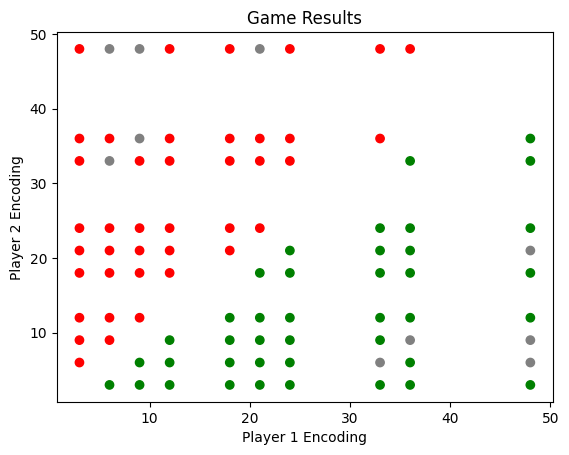

In [37]:
import os
import json
import matplotlib.pyplot as plt

# Function to calculate the encoding
def calculate_encoding(player, numTroops):
    # digit_count = []
    encoding = 0
    for i, allocation in enumerate(player):
        # count=0
        # n = allocation
        # while(n>0):
        #     count=count+1
        #     n=n//10
        # digit_count.append(count)
        # encoding += allocation * 10 ** sum(digit_count)
        # encoding += allocation * 10 ** i+1
        encoding += allocation * (numTroops+1) ** i
    return encoding

# Read the configurations
numCastles = 3  # Update as necessary
numTroops = 3  # Update as necessary

with open(f'configurations/C{numCastles:02}_T{numTroops:03}.json', 'r') as file:
    configs = json.load(file)

# Prepare data for plotting
x_data, y_data, colors = [], [], []

# Iterate over the files and collect data for plotting
for file in os.listdir(f'results/C{numCastles:02}_T{numTroops:03}/'):
    if '_' in file and file.endswith('.txt'):
        parts = file.split('_')
        player1_index, player2_index, result = int(parts[0]), int(parts[1]), int(parts[2].split('.')[0])
    
        player1 = configs[player1_index]
        player2 = configs[player2_index]
        # print(player1,player2)
        player1_encoding = calculate_encoding(player1, numTroops)
        player2_encoding = calculate_encoding(player2, numTroops)
    
        x_data.append(player1_encoding)
        y_data.append(player2_encoding)
        colors.append('green' if result == 1 else 'red' if result == -1 else 'gray')

# Create the plot
plt.scatter(x_data, y_data, c=colors)
plt.xlabel("Player 1 Encoding")
plt.ylabel("Player 2 Encoding")
plt.title("Game Results")
plt.show()

In [34]:
calculate_encoding([0,3],3)

12

In [44]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import random

numCastles = 2  # Update as necessary
numTroops = 100  # Update as necessary

# Create a directed graph
G = nx.DiGraph()

# Iterate over the files and add edges to the graph
for file in os.listdir(f'results/C{numCastles:02}_T{numTroops:03}/'):
    if '_' in file and file.endswith('.txt') and '(' not in file:
        # flip = random.randint(0, 1)
        # if (flip == 0):
        #     continue
        parts = file.split('_')
        player1_index, player2_index, result = int(parts[0]), int(parts[1]), int(parts[2].split('.')[0])

        # Add nodes and directed edges based on the result
        if result == 1:
            G.add_edge(player1_index, player2_index)
        elif result == -1:
            G.add_edge(player2_index, player1_index)
        elif result == 0:
            G.add_edge(player1_index, player2_index)
            G.add_edge(player2_index, player1_index)

# # Draw the graph
# plt.figure(figsize=(10, 8))
# nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, arrowstyle='->', arrowsize=20)
# plt.title("Graph of Game Results")
# plt.show()




In [50]:
# Calculate PageRank
pagerank = nx.pagerank(G)

# Sort nodes by PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=False)

# Print the sorted PageRank
for node, rank in sorted_pagerank:
    print(f"Node {node} has PageRank: {rank}")

Node 0 has PageRank: 0.0026981848914314197
Node 1 has PageRank: 0.0027211170318680736
Node 2 has PageRank: 0.002744477670084274
Node 3 has PageRank: 0.0027682792671966812
Node 4 has PageRank: 0.0027925347789146673
Node 5 has PageRank: 0.0028172576805279874
Node 6 has PageRank: 0.002842461993433202
Node 7 has PageRank: 0.0028681623133109853
Node 8 has PageRank: 0.002894373840075919
Node 9 has PageRank: 0.00292111240973075
Node 10 has PageRank: 0.0029483945282684724
Node 11 has PageRank: 0.002976237407778098
Node 12 has PageRank: 0.0030046590049237335
Node 13 has PageRank: 0.003033678061981711
Node 14 has PageRank: 0.003063314150637179
Node 15 has PageRank: 0.0030935877187599613
Node 16 has PageRank: 0.003124520140399785
Node 17 has PageRank: 0.0031561337692634106
Node 18 has PageRank: 0.003188451995961039
Node 19 has PageRank: 0.0032214993093368765
Node 20 has PageRank: 0.003255301362229256
Node 21 has PageRank: 0.0032898850420396003
Node 22 has PageRank: 0.003325278546527219
Node 23 ha

In [10]:
# Read the configurations
numCastles = 3 # Update as necessary
numTroops = 100  # Update as necessary

# Iterate over the files and collect data for plotting
count =0
for file in os.listdir(f'results/C{numCastles:02}_T{numTroops:03}/'):
    count+=1
print(count)

3106841


In [48]:
a = list(sums(2,100))

In [51]:
a[0]

(0, 100)

In [3]:
176851*176851

31276276201

In [4]:
2458413/31276276201

7.860312347290874e-05

In [7]:
5151*5151

26532801

In [12]:
100/(7.860312347290874e-05*100)

12722.14074730324

In [13]:
2*12722.14074730324

25444.28149460648

In [14]:
25444.28149460648/24

1060.1783956086033

In [15]:
1060.1783956086033/7

151.45405651551476

In [ ]:
151.45405651551476/

In [38]:
start to look at 3 trenches, start to ramp up the number of soldiers, ask what are the patterns (visually?), 

generate and look at your data (as much as humanly possible), push and pull of total you can generate versus realistic, 

roughly 8 minutes to go through 4 million data points, 2 minutes to do 1 million data points, if we wanted to do 10*10
figure out with youngsu how to solve everything in 12 days, it seems like we can do 10x10 in 12 days, get all of that data and generate the encoding plot

SyntaxError: invalid syntax (1207569945.py, line 1)

In [39]:
len(list(sums(10,10)))

92378

In [40]:
92378**2

8533694884

In [43]:
(((8533694884/10**6)*2)/60)/24

11.852354005555556